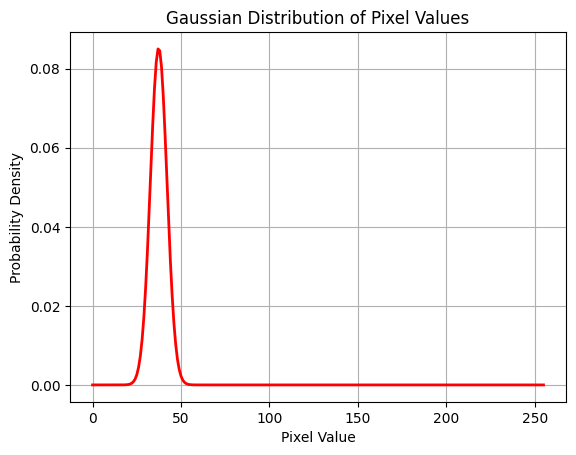

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_distribution(image_path):
    # Read the image as grayscale
    image = cv2.imread(image_path, 0)

    # Flatten the pixel values
    pixel_values = image.ravel()

    # Calculate mean and standard deviation
    mean = np.mean(pixel_values)
    std_dev = np.std(pixel_values)

    # Create a range of values for the x-axis (pixel values)
    x = np.linspace(0, 255, 256)

    # Calculate the Gaussian distribution
    pdf = norm.pdf(x, mean, std_dev)

    # Plot the Gaussian distribution
    plt.plot(x, pdf, 'r', linewidth=2)
    plt.title('Gaussian Distribution of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Probability Density')
    plt.grid()
    plt.show()

# Example usage:
image_path = '/home/users/maali/Computer_vision_SOC/samples/train/images/img108238.jpg'  # Replace with the path to your image
plot_gaussian_distribution(image_path)


True

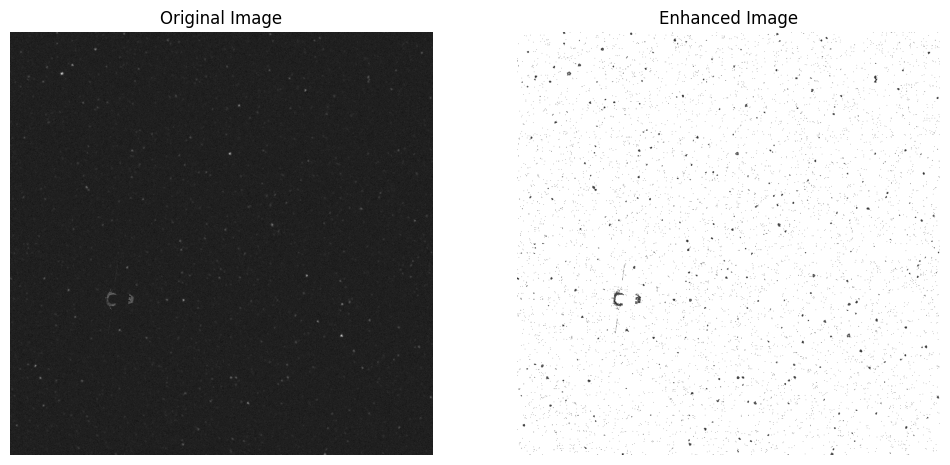

In [37]:
import numpy as np
import cv2
from scipy.stats import norm

def enhance_pixels_above_threshold(image_path, threshold):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Grayscale for simplicity
    if image is None:
        raise ValueError("Image not found or path is incorrect")
    
    # Flatten the image to get the intensity values
    pixel_values = image.flatten()
    
    # Calculate the mean and standard deviation of the intensities
    mean, std_dev = np.mean(pixel_values), np.std(pixel_values)
    
    # Calculate the probability density function (PDF) for the Gaussian distribution
    probabilities = norm.pdf(pixel_values, mean, std_dev)
    
    # Normalize probabilities to a scale of 0-1 (this step is optional)
    probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min())
    
    # Determine which pixels are above the threshold
    threshold_indices = np.where(probabilities > threshold)

    enhanced_pixels = pixel_values.astype(np.float32)  # Convert to float to prevent overflow
    enhanced_pixels[threshold_indices] *= 20

    # Clip values to the maximum allowed for uint8 to prevent wrapping around
    enhanced_pixels = np.clip(enhanced_pixels, 0, 255).astype(np.uint8)
    
    # Reshape the enhanced pixels back to the original image shape
    enhanced_image = enhanced_pixels.reshape(image.shape)
    
    return enhanced_image


image = cv2.imread("/home/users/maali/Computer_vision_SOC/samples/train/images/img108238.jpg", cv2.IMREAD_GRAYSCALE)

enhanced_img = enhance_pixels_above_threshold('/home/users/maali/Computer_vision_SOC/samples/train/images/img108238.jpg', threshold=0.04)


# Display the original and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_img, cmap='gray')
plt.axis('off')

# To save the image
cv2.imwrite('enhanced_image.jpg', enhanced_img)


True

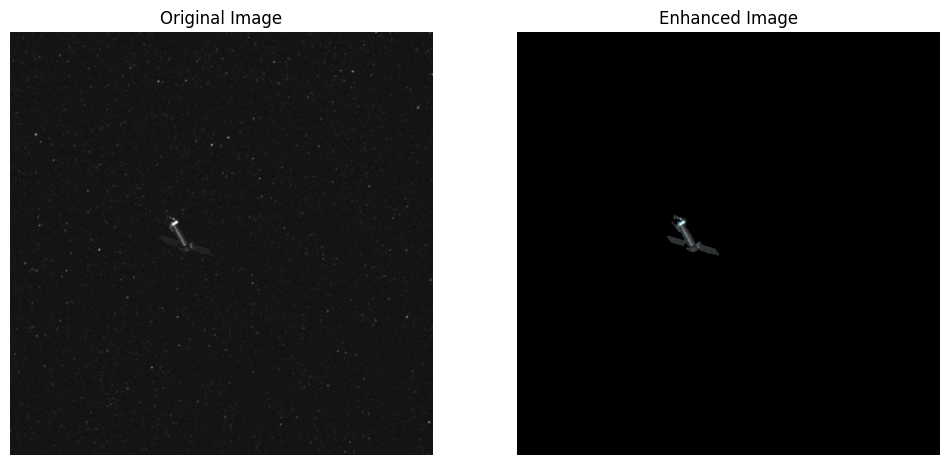

In [70]:
import os

def delete_images(directory_path, string):
    # Check if the directory exists
    if not os.path.isdir(directory_path):
        print(f"The directory {directory_path} does not exist.")
        return
    
    # Count the number of files deleted
    deleted_count = 0
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if 'background' is in the filename
        if string in filename:
            # Construct the full file path
            file_path = os.path.join(directory_path, filename)
            # Remove the file
            os.remove(file_path)
            deleted_count += 1
            print(f"Deleted {file_path}")
    
    if deleted_count == 0:
        print("No files were deleted.")
    else:
        print(f"Deleted {deleted_count} files containing '{string}'.")

# Example usage:
directory_path = "/home/users/maali/Computer_vision_SOC/samples/test/images"
directory_path2 = "/home/users/maali/Computer_vision_SOC/samples/test/labels"

delete_images(directory_path, 'img')
delete_images(directory_path2, 'img')

directory_path = "/home/users/maali/Computer_vision_SOC/samples/val/images"
directory_path2 = "/home/users/maali/Computer_vision_SOC/samples/val/labels"

delete_images(directory_path, 'img')
delete_images(directory_path2, 'img')


directory_path = "/home/users/maali/Computer_vision_SOC/samples/train/images"
directory_path2 = "/home/users/maali/Computer_vision_SOC/samples/train/labels"

delete_images(directory_path, 'img')
delete_images(directory_path2, 'img')


In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO


def download_image(image_url, save_directory, image_name, new_size=(1024,1024)):
    # Make the directory if it doesn't exist
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Get the image from the URL
    response = requests.get(image_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Read the image from the response bytes
        image = Image.open(BytesIO(response.content))
        
        # If a new size is provided, resize the image
        if new_size:
            image = image.resize(new_size, Image.LANCZOS)
        
        # Save the image
        image_path = os.path.join(save_directory, image_name)
        image.save(image_path)
        print(f"Image saved at: {image_path}")
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

# Example usage:
image_urls = ['https://images.unsplash.com/photo-1501630834273-4b5604d2ee31?auto=format&fit=crop&q=80&w=1740&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://images.unsplash.com/photo-1517758478390-c89333af4642?auto=format&fit=crop&q=80&w=1734&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://plus.unsplash.com/premium_photo-1670354737789-8cc4d225ba7c?auto=format&fit=crop&q=80&w=1742&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://images.unsplash.com/photo-1501630834273-4b5604d2ee31?auto=format&fit=crop&q=80&w=1740&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://images.unsplash.com/photo-1601297183305-6df142704ea2?auto=format&fit=crop&q=80&w=1974&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://plus.unsplash.com/premium_photo-1672999825111-72da7b0152e8?auto=format&fit=crop&q=80&w=1944&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://images.unsplash.com/photo-1454335459109-cd8a2c230bc2?auto=format&fit=crop&q=80&w=1830&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D']



for i in range(len(image_urls)):
    image_name = 'abackground'+str(i)+'.jpg'
    download_image(image_urls[i], save_directory, image_name)


In [ ]:
import cv2
import numpy as np
import os

def create_background_images(df, image_dir, output_dir ,sample_size = None):

    if sample_size is not None : 
        df = df.sample(n=sample_size)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate over the DataFrame rows
    for idx, row in df.iterrows():
        # Read the image
        image_path = os.path.join(image_dir, row['filename'])
        image = cv2.imread(image_path)

        # Check if the image was properly loaded
        if image is None:
            print(f"Could not read image {image_path}. Skipping...")
            continue

        # Get the bounding box coordinates
        y1, x1, y2, x2 = map(int, row['bbox'])
    
        h, w, _ = image.shape
        max_y = min(h - (y2-y1), y1)
        max_x = min(w - (x2-x1), x1)

        if max_y < y2-y1 or max_x < x2-x1:
            print(f"Could not find a suitable patch for image {image_path}. Skipping...")
            continue

        patch_y = np.random.randint(0, max_y*2)
        patch_x = np.random.randint(0, max_x*2)

        patch = image[patch_y:patch_y+y2-y1, patch_x:patch_x+x2-x1]

        # Replace the object in the bounding box with the selected patch
        image[y1:y2, x1:x2] = patch

        # Save the new image with the object removed
        background_image_path = os.path.join(output_dir, f'background{idx+1}.jpg')
        cv2.imwrite(background_image_path, image)
        print(f"Background image saved as {background_image_path}")

create_background_images(sampler.sampled_train_df, 
'/home/users/maali/Computer_vision_SOC/samples/train/images', 
'/home/users/maali/Computer_vision_SOC/samples/train/images',
sample_size = 1000)
